In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#6166B3', '#e8eff6', '#0b2553']

prompt = color_map[-1]
main_color = color_map[0]

css_file = '''

    div #notebook {
    background-color: white;
    line-height: 20px;
    }

    #notebook-container {
    %s
    margin-top: 2em;
    padding-top: 2em;
    border-top: 4px solid %s; /* light orange */
    -webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    }

    div .input {
    margin-bottom: 1em;
    }

    .rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
    color: %s; /* light orange */
    font-weight: 600;
    }

    div.input_area {
    border: none;
        background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
        border-top: 2px solid %s; /* light orange */
    }

    div.input_prompt {
    color: %s; /* light blue */
    }

    div.output_prompt {
    color: %s; /* strong orange */
    }

    div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
    background: %s; /* light orange */
    }

    div.cell.selected, div.cell.selected.jupyter-soft-selected {
        border-color: %s; /* light orange */
    }

    .edit_mode div.cell.selected:before {
    background: %s; /* light orange */
    }

    .edit_mode div.cell.selected {
    border-color: %s; /* light orange */

    }
    '''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

 # <h1 style='background:#483D8B; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>PREDICTING HEALTH OF FOETUS</center></h1>
 
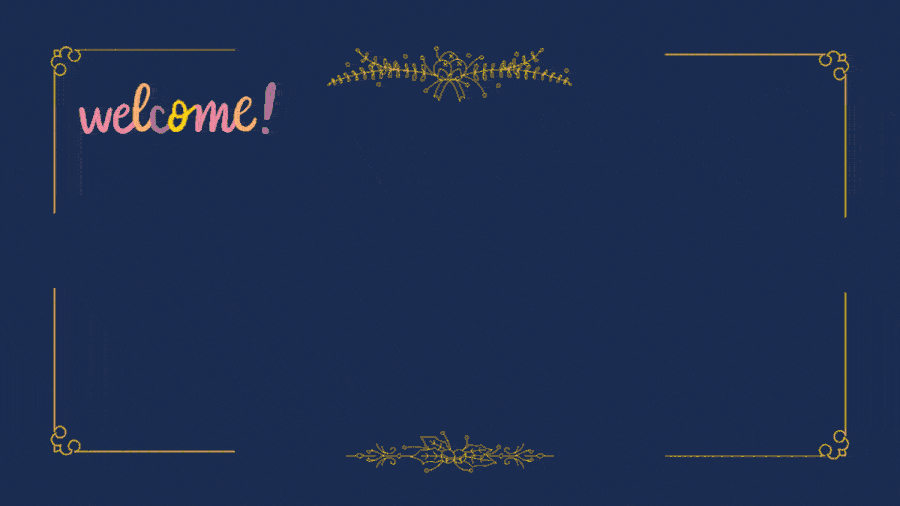

<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>TABLE OF CONTENTS</center></h1>

### [**1. IMPORTING LIBRARIES**](#title-one)
    
### [**2. LOADING DATA**](#title-two)

### [**3. DATA ANALYSIS & VISUALIZATION**](#title-three)

### [**4. MODEL BUILDING**](#title-four) 

### [**5. END**](#title-five)

<a id = "title-one"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>IMPORTING LIBRARIES</center></h1>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score


<a id = "title-two"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>LOADING DATA</center></h1>

In [ ]:
data_df = pd.read_csv("../input/fetal-health-classification/fetal_health.csv")
data_df.sample(10)

<div style="border-radius:10px;
            border :#483D8B solid;
            background-color:#B0C4DE;
           font-size:110%;
            text-align: left">
    
## <h2 style='border:0; color:black'><center>About the data (Description of attributes)</center></h2>

**This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes: "Normal", "Suspect" & "Pathological". Dataset having the following features:**  
    
* **baseline value:** Baseline Fetal Heart Rate (FHR) (beats per minute)   
* **accelerations:** Number of accelerations per second
* **fetal_movement:** Number of fetal movements per second    
* **uterine_contractions:** Number of uterine contractions per second
* **light_decelerations:** Number of light decelerations (LDs) per second
* **severe_decelerations:** Number of severe decelerations (SDs) per second
* **prolongued_decelerations:** Number of prolonged decelerations (PDs) per second
* **abnormal_short_term_variability:** Percentage of time with abnormal short term variability
* **mean_value_of_short_term_variability:** Mean value of short term variability
* **percentage_of_time_with_abnormal_long_term_variability:** Percentage of time with abnormal long term variability
* **mean_value_of_long_term_variability:** Mean value of long term variability
* **histogram_width:** Width of histogram made using all values from a record 
* **histogram_min:** Histogram minimum value 
* **histogram_max:** Histogram maximum value 
* **histogram_number_of_peaks:** Number of peaks in the exam histogram 
* **histogram_number_of_zeroes:** Number of zeros in the exam histogram 
* **histogram_mode:** Histogram mode
* **histogram_mean:** Histogram mean
* **histogram_median:** Histogram median
* **histogram_variance:** Histogram variance
* **histogram_tendency:** Histogram tendency
* **fetal_health:** Encoded as 1-Normal; 2-Suspect; 3-Pathological. <mark>It is our very target column in the dataset.</mark>

<a id = "title-three"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>DATA ANALYSIS & VISUALIZATION</center></h1>

### **<span style="color:#483D8B;"><center>Checking for missing values & categorical variables</center></span>**

In [ ]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

In [ ]:
# Visualizing the missing values in the dataset, 
missing_values = msno.bar(data_df, figsize = (16,5),color = "#483D8B")

### **<span style="color:#483D8B;">Note: </span>**
* <strong>There are 2126 non-null values in all the attributes thus no missing values.</strong>
* <strong>Datatype of all the features are float64 which works well with the model building.</strong>

### **<span style="color:#483D8B;"><center>Descriptive Statistics</center></span>**

In [ ]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

In [ ]:
# Evaluating distributions of the features 
hist_plot = data_df.hist(figsize = (20,20), color = "#483D8B")

### **<span style="color:#483D8B;">Note: </span>**
* <strong>All the attributes more or less are midly skewed and are normally distributed except the features "light_decelerations", "precentage_of_time_with_abnormal_long_term_variability" etc.</strong>

### **<span style="color:#483D8B;"><center>Evaluating Target Feature</center></span>**

In [ ]:
# Evaluating the target column and checking for imbalance of the data, 
colors=["#483D8B","#4682B4", "#87CEFA"]
ax = sns.countplot(data= data_df, x="fetal_health", palette=colors)
ax.bar_label(ax.containers[0])
plt.show()

### **<span style="color:#483D8B;">Note: </span>**
* <strong>Target labels are highly imbalanced as can be seen from the plot.</strong>

### **<span style="color:#483D8B;"><center>Correlation Matrix</center></span>**

In [ ]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#B0E0E6", "#87CEFA", "#4682B4", "#CD853F", "#DEB887", "#FAEBD7"])

corrmat= data_df.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,cmap=cols,annot=True)
plt.show()

### **<span style="color:#483D8B;">Note: </span>**
* <strong>Features, "prolongued_decelerations" followed by "abnormal_short_term_variability" & "percentage_of_time_with_abnormal_long_term_variability" are strongly correlated and hence the most important features.</strong>
* <strong>Features, "histogram_number_of_zeroes", "histogram_number_of_peaks", "histogram_max", "histogram_width" shows correlation less than the |0.1| hence, can be dropped off before feeding in to the algorithm. </strong>

### **<span style="color:#483D8B;"><center>Scaling the Data</center></span>**

In [ ]:
# Defining independent and dependent attributes in training and test sets
X=data_df.drop(["fetal_health"],axis=1)
y=data_df["fetal_health"]

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

### **<span style="color:#483D8B;"><center>Checking for Outliers</center></span>**

In [ ]:
features=['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
             'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

In [ ]:
#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

### **<span style="color:#483D8B;">Note: </span>**
* <strong>The plot clearly indicates that all the features are in same range since we have scaled the data.</strong>
* <strong>Outliers can be spotted in certain features, which we have to make a call whether to take it along or drop it off.</strong>
* <strong>Assuming outliers aren't cause of the typo or measurement error (human error) we aren't taking it down to avoid the overfitting of the model as well as the loss of information. </strong>

<a id = "title-four"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>MODEL BUILDING</center></h1>

### **<span style="color:#483D8B;"><center>Splitting Train & Test Set</center></span>**

In [ ]:
# Splitting the training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

### **<span style="color:#483D8B;"><center>Model Selection</center></span>**

In [ ]:
# Building pipelines of model for various classifiers

pipeline_lr = Pipeline([('lr_classifier',LogisticRegression())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Gradient Boost', 3:'RandomForest', 4: 'KNN'}


# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

### **<span style="color:#483D8B;">Note: </span>**
* <strong>Gradient Boost among the five models performs best with our data so we shall proceed with it.</strong>

### **<span style="color:#483D8B;"><center>Grandient Boost Classifier</center></span>**

In [ ]:
# Baseline model of gradient boosting classifier with default parameters:
gbcl = GradientBoostingClassifier()
gbcl_model = gbcl.fit(X_train, y_train)
print(f"Baseline Gradient Boosting Classifier Score: {round(gbcl_model.score(X_test, y_test), 2)}")

pred_gbcl = gbcl_model.predict(X_test)

In [ ]:
# Cross validate Gradient Boosting Classifier model
scores_gbcl = cross_val_score(gbcl, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

print(f"CV scores for Gradient Boosting Classifier model:\n{scores_gbcl}")
print(f"CV Mean score: {round(scores_gbcl.mean(), 2)}")

### **<span style="color:#483D8B;"><center>Grid Search CV</center></span>**

In [ ]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [ ]:
GridSearchCV_gbcl = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=parameters, 
                                cv=2,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_gbcl.fit(X_train, y_train);

In [ ]:
best_parameters = GridSearchCV_gbcl.best_params_
print(f"Best parameters for the model:\n{best_parameters}")

### **<span style="color:#483D8B;"><center>Testing stage</center></span>**

In [ ]:
# Testing with the best parameters, 

gbcl = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=0.1, loss="deviance", 
                                  max_depth=6, max_features="log2", min_samples_leaf=0.3, 
                                  min_samples_split=0.5, n_estimators=500, random_state=25)

gbcl_mod = gbcl.fit(X_train, y_train)
pred_gbcl = gbcl_mod.predict(X_test)

score_gbcl_train = gbcl_mod.score(X_train, y_train)
score_gbcl_test = gbcl_mod.score(X_test, y_test)

In [ ]:
print(f"r^2(coefficient of determination) on training set = {round(score_gbcl_train, 3)}")
print(f"r^2(coefficient of determination) on testing set = {round(score_gbcl_test, 3)}")

In [ ]:
# Getting score on the Test set, 

pred_gbcl = pipeline_gbcl.predict(X_test)
accuracy = accuracy_score(y_test, pred_gbcl)
print(f" Testing Score of the model is {accuracy}")

In [ ]:
# Getting the Classification report 
print(classification_report(y_test, pred_gbcl))

In [ ]:
# Getting the Confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_gbcl)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

### **<span style="color:#483D8B;">Our model accuracy on the <mark>test data is 96%+</mark> and the finest thing to note is the accuracy is maintained across labels even after the imbalance as we'd seen</span>**



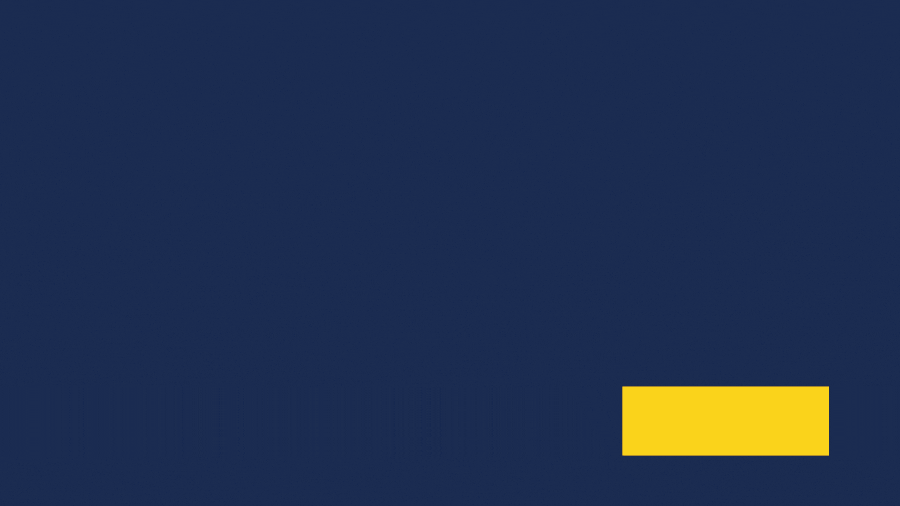

<a id = "title-five"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>END</center></h1>